### Tasks

#### 1. Is it possible to predict the product tier from the information given in the other columns?
#### 2. Is it possible to predict detail views from the information given in the other columns?

#### To start with, import few of libraries which are going to be used

In [150]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

In [151]:
"""
This function reads a csv file and returns a pandas dataframe.
Delimeter can be passed as a parameter

Input : filename - Name of the csv file with extension
        delimeter - delimeter of the file (default: ",")

Returns: A pandas dataframe
"""

def readcsv_for_pandas(filename, delimiter=","):
    data = pd.read_csv(filename, delimiter=delimiter)
#     print(data_train.head())
    return data

In [152]:
data = readcsv_for_pandas("/Users/adityaiyengar/Desktop/AS24_Case_Study_Data.csv", delimiter=";")

* **For the first task, lets concentrate on the column \'product_tier\'**
* **Let's plot differnt values of this column to get an idea of the data set** <br><br>
 PS - Please run this cell twice, as on the first run the plot doesn't come up

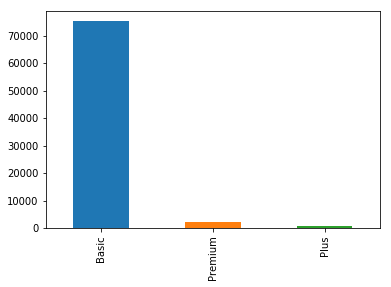

In [153]:
plot_product_tier = pd.value_counts(data['product_tier']).plot.bar()

**As seen from the above plot, there are more than 75,000 "Basic" values and comparatively very few for "Premium" and "Plus". <br>
This makes the dataset imbalanced for the first task. <br>**
**Hence, let's try to use Random forest initially for building a model**

**Now, we have to preprocess the data. <br>
To begin with, we can remove NANs(if any) from the data. <br>
Also, we can look at the datatype of the columns.**

In [154]:
"""
This function removes NAN (not a number) from a pandas dataframe.

Input : dataframe - Pandas dataframe

Returns: A pandas dataframe
"""

def removeNAN(dataframe):
    for columnName in data:
        data[data[columnName].notna()]
        print(columnName + " : " + str(type(columnName)))
    return data
data = removeNAN(data)

article_id : <class 'str'>
product_tier : <class 'str'>
make_name : <class 'str'>
price : <class 'str'>
first_zip_digit : <class 'str'>
first_registration_year : <class 'str'>
created_date : <class 'str'>
deleted_date : <class 'str'>
search_views : <class 'str'>
detail_views : <class 'str'>
stock_days : <class 'str'>
ctr : <class 'str'>


In [155]:
print(data.head())

   article_id product_tier      make_name  price  first_zip_digit  \
0   350625839        Basic     Mitsubishi  16750                5   
1   354412280        Basic  Mercedes-Benz  35950                4   
2   349572992        Basic  Mercedes-Benz  11950                3   
3   350266763        Basic           Ford   1750                6   
4   355688985        Basic  Mercedes-Benz  26500                3   

   first_registration_year created_date deleted_date  search_views  \
0                     2013     24.07.18     24.08.18        3091.0   
1                     2015     16.08.18     07.10.18        3283.0   
2                     1998     16.07.18     05.09.18        3247.0   
3                     2003     20.07.18     29.10.18        1856.0   
4                     2014     28.08.18     08.09.18         490.0   

   detail_views  stock_days                   ctr  
0         123.0          30   0.03780329990294403  
1         223.0          52   0.06792567773378008  
2       

* **As seen from above, all column are string values.**
* **Let us convert the different 'make_name' string values to interger values as this becomes essential for training the model. (One hot encoding can also be used, but I do it this way)**
* **'product_tier' is used as a label column for training the data**

In [156]:
article_id = data.article_id

# data['product_tier'] = pd.factorize(data['product_tier'] )[0] + 1
# print("Product tier unique labels: ", np.unique(data['product_tier']))

product_tier = data.product_tier

data['make_name'] = pd.factorize(data['make_name'] )[0] + 1
print("make name unique labels: ", np.unique(data['make_name']))    # To know the unique labels for 'make_name'

make name unique labels:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91]


* **Let me drop the columns article_id, first_zip_digit, created_date, deleted_date as I don't see these features contribute to the classification task. <br>**
* **Also, let us convert the columns - first_registration_year, search_views, detail_views, stock_days, ctr to floating values.**

In [157]:
new_data = data.drop(['article_id', 'product_tier', 'first_zip_digit', 'created_date', 'deleted_date'], axis=1)
new_data.head()

,make_name,price,first_registration_year,search_views,detail_views,stock_days,ctr
0,1,16750,2013,3091.0,123.0,30,0.03780329990294403
1,2,35950,2015,3283.0,223.0,52,0.06792567773378008
2,2,11950,1998,3247.0,265.0,51,0.0816137973514013
3,3,1750,2003,1856.0,26.0,101,0.014008620689655173
4,2,26500,2014,490.0,20.0,12,0.04081632653061224


* **Now I can *convert search_views, detail_views and ctr* to float values and remove NANs, if any that come up after conversion.**

In [158]:
new_data['search_views'] = pd.to_numeric(new_data.search_views, downcast="float", errors='coerce')
new_data = new_data[new_data['search_views'].notna()]

new_data['detail_views'] = pd.to_numeric(new_data.detail_views, downcast="float", errors='coerce')
new_data = new_data[new_data['detail_views'].notna()]

new_data['ctr'] = pd.to_numeric(new_data.ctr, downcast="float", errors='coerce')
new_data =  new_data[new_data['ctr'].notna()]

In [159]:
x_train,x_test,y_train,y_test=train_test_split(new_data, product_tier,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [78215, 78321]

* **The above error tells us that there are few rows dropped from training_data which were not dropped from 'product_tier' as we removed that column before converting.**
* **Hence, we repeat the entire process but keeping 'product_tier' column and dropping it later.**

In [160]:
training_data = data.drop(['article_id', 'first_zip_digit', 'created_date', 'deleted_date'], axis=1)
training_data.head()

,product_tier,make_name,price,first_registration_year,search_views,detail_views,stock_days,ctr
0,Basic,1,16750,2013,3091.0,123.0,30,0.03780329990294403
1,Basic,2,35950,2015,3283.0,223.0,52,0.06792567773378008
2,Basic,2,11950,1998,3247.0,265.0,51,0.0816137973514013
3,Basic,3,1750,2003,1856.0,26.0,101,0.014008620689655173
4,Basic,2,26500,2014,490.0,20.0,12,0.04081632653061224


In [161]:
training_data['search_views'] = pd.to_numeric(training_data.search_views, downcast="float", errors='coerce')
training_data = training_data[training_data['search_views'].notna()]

training_data['detail_views'] = pd.to_numeric(training_data.detail_views, downcast="float", errors='coerce')
training_data = training_data[training_data['detail_views'].notna()]

training_data['ctr'] = pd.to_numeric(training_data.ctr, downcast="float", errors='coerce')
training_data =  training_data[training_data['ctr'].notna()]

* **We drop column - product_tier and split the data**

In [162]:
product_tier = training_data.product_tier
training_data = training_data.drop(['product_tier'], axis=1)

x_train,x_test,y_train,y_test=train_test_split(training_data, product_tier,test_size=0.2)

In [163]:
x_train.shape

(62572, 7)

In [164]:
x_train.head()

,make_name,price,first_registration_year,search_views,detail_views,stock_days,ctr
66885,6,24750,2018,212.0,0.0,22,0.000000
58830,17,9950,2010,2894.0,146.0,36,0.050449
33140,5,1950,2003,1054.0,10.0,19,0.009488
52058,6,17900,2017,40.0,0.0,7,0.000000
12620,8,2995,2007,69.0,4.0,-1,0.057971


#### Till now, we have been processing or preprocessing the data. Next, we train the model

#### We will use random forest method to train the model and later, we use the test data to test the model

* **I use random search for hyper-parameter tuning (through a dictionary)**
* **I use a dictionary to set the parameter distribution. The best value of n_estimators and max_depth can be estimated later on (in between the range of the defined values)**

In [165]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

random_grid = {'n_estimators':np.arange(20,100,10),
              'max_depth':np.arange(10,60,10),
              'class_weight':['balanced']}

* **Train a random classifier using the above dictionary**

In [170]:
rf_classifier = RandomForestClassifier()
randomforest_classifier = RandomizedSearchCV(estimator=rf_classifier, param_distributions = random_grid, n_iter =20, random_state=42)
randomforest_classifier.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'class_weight': ['balanced'],
                                        'max_depth': array([10, 20, 30, 40, 50]),
                                        'n_estimators': array([20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42)

* **Find the best values for n_estimators and max_depth**

In [171]:
randomforest_classifier.best_params_

{'n_estimators': 90, 'max_depth': 20, 'class_weight': 'balanced'}

* **Select the best model for prediction**

In [172]:
best_model = randomforest_classifier.best_estimator_

In [173]:
"""
This function prints values and returns predicted values from a model.

Input : x_test - test values
        y_test - test labels
        model - ML model

Returns: prediction - predicted values from the model
"""

def print_test_pred_values(x_test, y_test, model):
    prediction = model.predict(x_test)
    print()
    print("Unique test values for product tier: ", np.unique(y_test))
    print()
    print("Unique prediction values for product tier: ", np.unique(prediction))
    print()
    print("First 10 test values: ")
    print(y_test[:10])
    print()
    print("First 10 predicted values: ", prediction[:10])
    acc = metrics.accuracy_score(prediction, y_test)
    print()
    print("Accuracy: ", acc)
    return prediction

In [174]:
prediction = print_test_pred_values(x_test, y_test, best_model)


Unique test values for product tier:  ['Basic' 'Plus' 'Premium']

Unique prediction values for product tier:  ['Basic' 'Premium']

First 10 test values: 
40081    Basic
70879    Basic
6066     Basic
44178    Basic
63897    Basic
9379     Basic
16755    Basic
44858    Basic
56469    Basic
15317    Basic
Name: product_tier, dtype: object

First 10 predicted values:  ['Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic'
 'Basic']

Accuracy:  0.9711692130665474


In [175]:
"""
This function prints number of values for each class.

Input : y_test - test labels
        prediction - predicted values from the model

Returns: None
"""

def print_test_pred_data(y_test, prediction):
    count1_test = count2_test = count3_test = 0
    for j in y_test:
        if j=='Basic' or j==1:
            count1_test+=1
        if j=='Plus' or j==2:
            count2_test+=1
        if j=='Premium' or j==3:
            count3_test+=1
    print()
    print("Labels for test data")
    print("Basic: ", count1_test, ", Plus: ", count2_test, ", Premium: ", count3_test)
    print()

    count1_pred = count2_pred = count3_pred = 0
    for j in prediction:
        if j=='Basic' or j==1:
            count1_pred+=1
        if j=='Plus' or j==2:
            count2_pred+=1
        if j=='Premium' or j==3:
            count3_pred+=1
    print("Labels for prediction data")
    print("Basic: ", count1_pred, ", Plus: ", count2_pred, ", Premium: ", count3_pred)

In [176]:
print_test_pred_data(y_test, prediction)


Labels for test data
Basic:  15050 , Plus:  116 , Premium:  477

Labels for prediction data
Basic:  15350 , Plus:  0 , Premium:  293


* **As you can see, the accuracy for the model is high. But that is because the model is able to predict the class-'Basic', but not the other two classes. This is because of imbalance in the data (with huge number of samples for class-'Basic'). This is despite using 'class_weight' parameter during training.**
* **I get the same result if I use a simple random forest without random search.**

In [177]:
random_forest_model = RandomForestClassifier(n_estimators=20, class_weight="balanced")
random_forest_model.fit(x_train,y_train)
prediction = print_test_pred_values(x_test, y_test, random_forest_model)
print_test_pred_data(y_test, prediction)


Unique test values for product tier:  ['Basic' 'Plus' 'Premium']

Unique prediction values for product tier:  ['Basic' 'Plus' 'Premium']

First 10 test values: 
40081    Basic
70879    Basic
6066     Basic
44178    Basic
63897    Basic
9379     Basic
16755    Basic
44858    Basic
56469    Basic
15317    Basic
Name: product_tier, dtype: object

First 10 predicted values:  ['Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic'
 'Basic']

Accuracy:  0.9698906859298089

Labels for test data
Basic:  15050 , Plus:  116 , Premium:  477

Labels for prediction data
Basic:  15415 , Plus:  2 , Premium:  226


* **Instead, we try using Balanced random forest classifier of imblearn and verify the results**

In [178]:
from imblearn.ensemble import BalancedRandomForestClassifier

balanced_random_forest_model = BalancedRandomForestClassifier(n_estimators=20)
balanced_random_forest_model.fit(x_train,y_train)

prediction = print_test_pred_values(x_test, y_test, balanced_random_forest_model)
print_test_pred_data(y_test, prediction)


Unique test values for product tier:  ['Basic' 'Plus' 'Premium']

Unique prediction values for product tier:  ['Basic' 'Plus' 'Premium']

First 10 test values: 
40081    Basic
70879    Basic
6066     Basic
44178    Basic
63897    Basic
9379     Basic
16755    Basic
44858    Basic
56469    Basic
15317    Basic
Name: product_tier, dtype: object

First 10 predicted values:  ['Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic' 'Basic'
 'Basic']

Accuracy:  0.7789426580579173

Labels for test data
Basic:  15050 , Plus:  116 , Premium:  477

Labels for prediction data
Basic:  11883 , Plus:  2884 , Premium:  876


* **As seen, the balanced random forest classifier produces results with less accuracy**
* **The next option which I looked into was upsampling the data. The problem with this approach is the training time increases. We can use sklearn's resample utility function**

In [179]:
data.product_tier.value_counts()   # Displays the number of samples for each class

Basic      75421
Premium     2324
Plus         576
Name: product_tier, dtype: int64

In [180]:
from sklearn.utils import resample

df_majority = data[data.product_tier=="Basic"]
df_minority_1 = data[data.product_tier=="Plus"]
df_minority_2 = data[data.product_tier=="Premium"]

* **Now, we try to upsample to balance the different classes**

In [181]:
# Upsample minority class

df_minority_upsampled_1 = resample(df_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=data.product_tier.value_counts()[0],    # to match majority class
                                 random_state=123) # reproducible results
 
df_minority_upsampled_2 = resample(df_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=data.product_tier.value_counts()[0],    # to match majority class
                                 random_state=123) # reproducible results


In [182]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled_1, df_minority_upsampled_2])
 
# Display new class counts
df_upsampled.product_tier.value_counts()

Premium    75421
Plus       75421
Basic      75421
Name: product_tier, dtype: int64

* **Now, we repeat the same process as in the above examples**


   article_id product_tier  make_name  price  first_zip_digit  \
0   350625839        Basic          1  16750                5   
1   354412280        Basic          2  35950                4   
2   349572992        Basic          2  11950                3   
3   350266763        Basic          3   1750                6   
4   355688985        Basic          2  26500                3   

   first_registration_year created_date deleted_date  search_views  \
0                     2013     24.07.18     24.08.18        3091.0   
1                     2015     16.08.18     07.10.18        3283.0   
2                     1998     16.07.18     05.09.18        3247.0   
3                     2003     20.07.18     29.10.18        1856.0   
4                     2014     28.08.18     08.09.18         490.0   

   detail_views  stock_days                   ctr  
0         123.0          30   0.03780329990294403  
1         223.0          52   0.06792567773378008  
2         265.0          51    

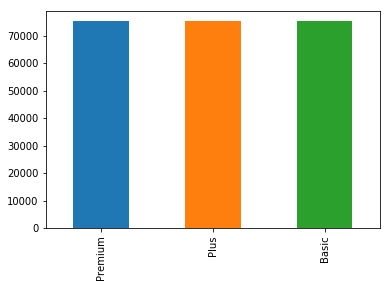

In [183]:
plot_product_tier = pd.value_counts(df_upsampled['product_tier']).plot.bar()

print()
print(df_upsampled.head())

product_tier = df_upsampled.product_tier

df_upsampled['make_name'] = pd.factorize(df_upsampled['make_name'] )[0] + 1
print()
print("make name unique labels: ", np.unique(df_upsampled['make_name']))    # To know the unique labels for 'make_name'

In [184]:
training_data_up_sampled = df_upsampled.drop(['article_id', 'first_zip_digit', 'created_date', 'deleted_date'], axis=1)

training_data_up_sampled['search_views'] = pd.to_numeric(training_data_up_sampled.search_views, downcast="float", errors='coerce')
training_data_up_sampled = training_data_up_sampled[training_data_up_sampled['search_views'].notna()]

training_data_up_sampled['detail_views'] = pd.to_numeric(training_data_up_sampled.detail_views, downcast="float", errors='coerce')
training_data_up_sampled = training_data_up_sampled[training_data_up_sampled['detail_views'].notna()]

training_data_up_sampled['ctr'] = pd.to_numeric(training_data_up_sampled.ctr, downcast="float", errors='coerce')
training_data_up_sampled =  training_data_up_sampled[training_data_up_sampled['ctr'].notna()]

product_tier = training_data_up_sampled.product_tier
training_data_up_sampled = training_data_up_sampled.drop(['product_tier'], axis=1)

x_train_up_sampled,x_test_up_sampled,y_train_up_sampled,y_test_up_sampled=train_test_split(training_data_up_sampled, product_tier,test_size=0.2)

In [185]:
print()
print(x_train_up_sampled.shape)
print()
x_train_up_sampled.head()


(180668, 7)



,make_name,price,first_registration_year,search_views,detail_views,stock_days,ctr
48030,12,31900,2016,27438.0,423.0,90,0.015417
23287,10,5745,2010,1482.0,60.0,3,0.040486
435,17,39900,2018,4640.0,96.0,14,0.020690
53229,7,3250,1999,18119.0,619.0,35,0.034163
31397,31,14900,2008,1664.0,43.0,13,0.025841


In [186]:
random_forest_model_upsampled = RandomForestClassifier(n_estimators=20, class_weight="balanced")
random_forest_model_upsampled.fit(x_train_up_sampled,y_train_up_sampled)
prediction_up_sampled = print_test_pred_values(x_test_up_sampled, y_test_up_sampled, random_forest_model_upsampled)
print_test_pred_data(y_test_up_sampled, prediction_up_sampled)


Unique test values for product tier:  ['Basic' 'Plus' 'Premium']

Unique prediction values for product tier:  ['Basic' 'Plus' 'Premium']

First 10 test values: 
53477       Plus
59117       Plus
52797       Plus
24171       Plus
28042       Plus
48954    Premium
70808       Plus
26035    Premium
6864     Premium
46084       Plus
Name: product_tier, dtype: object

First 10 predicted values:  ['Plus' 'Plus' 'Plus' 'Plus' 'Plus' 'Premium' 'Plus' 'Premium' 'Premium'
 'Plus']

Accuracy:  0.9968561813673397

Labels for test data
Basic:  15089 , Plus:  15029 , Premium:  15050

Labels for prediction data
Basic:  14947 , Plus:  15041 , Premium:  15180


* **As you can see upsampling drastically improves the results**

* **For the second task, we will build a random forest regression model, as we are trying to predict a number.**
* **We follow the same steps as in the previous tasks**

In [187]:
training_data_regressor = df_upsampled.drop(['article_id', 'first_zip_digit', 'created_date', 'deleted_date'], axis=1)

training_data_regressor['product_tier'] = pd.factorize(training_data_regressor['product_tier'] )[0] + 1
print("Product tier unique labels: ", np.unique(training_data_regressor['product_tier']))

training_data_regressor['search_views'] = pd.to_numeric(training_data_regressor.search_views, downcast="float", errors='coerce')
training_data_regressor = training_data_regressor[training_data_regressor['search_views'].notna()]

training_data_regressor['detail_views'] = pd.to_numeric(training_data_regressor.detail_views, downcast="float", errors='coerce')
training_data_regressor = training_data_regressor[training_data_regressor['detail_views'].notna()]

training_data_regressor['ctr'] = pd.to_numeric(training_data_regressor.ctr, downcast="float", errors='coerce')
training_data_regressor = training_data_regressor[training_data_regressor['ctr'].notna()]

print()
print(training_data_regressor.head())

Product tier unique labels:  [1 2 3]

   product_tier  make_name  price  first_registration_year  search_views  \
0             1          1  16750                     2013        3091.0   
1             1          2  35950                     2015        3283.0   
2             1          2  11950                     1998        3247.0   
3             1          3   1750                     2003        1856.0   
4             1          2  26500                     2014         490.0   

   detail_views  stock_days       ctr  
0         123.0          30  0.037803  
1         223.0          52  0.067926  
2         265.0          51  0.081614  
3          26.0         101  0.014009  
4          20.0          12  0.040816  


* **We drop column - detail_views and split the data**

In [188]:
detail_views = training_data_regressor.detail_views
training_data_regressor = training_data_regressor.drop(['detail_views'], axis=1)

x_train_regressor,x_test_regressor,y_train_regressor,y_test_regressor=train_test_split(training_data_regressor, detail_views, test_size=0.2)

In [189]:
print()
print(x_train_regressor.shape)
print()
x_train_regressor.head()


(180668, 7)



,product_tier,make_name,price,first_registration_year,search_views,stock_days,ctr
12984,2,12,4950,2004,11487.0,49,0.063637
32769,3,4,1450,1999,13830.0,12,0.022632
53257,1,3,13400,2017,465.0,2,0.064516
27824,2,17,47995,2018,1198.0,15,0.050083
30689,3,10,16750,2013,4754.0,42,0.026083


In [190]:
"""
This function prints various evaluation measures for regression model.

Input : x_test - test values
        y_test - test labels
        prediction - regression model

Returns: None
"""

def evaluate_regression_model(x_test, y_test, model):
    prediction = model.predict(x_test)
    print()
    print("First 10 test values: ")
    print(y_test[:10])
    print()
    print("First 10 predicted values: ", prediction[:10])
    print()
    print("Mean absolute error =", round(metrics.mean_absolute_error(y_test, prediction), 2))
    print()
    print("Mean squared error =", round(metrics.mean_squared_error(y_test, prediction), 2)) 
    print()
    print("Median absolute error =", round(metrics.median_absolute_error(y_test, prediction), 2))


In [191]:
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_regressor_model = RandomForestRegressor()
rf_regressor_model.fit(x_train_regressor,y_train_regressor)

RandomForestRegressor()

In [192]:
accuracy = evaluate_regression_model(x_test_regressor, y_test_regressor, rf_regressor_model)


First 10 test values: 
626        5.0
17185     20.0
38304    977.0
47962     95.0
70932     44.0
10797      1.0
13821    306.0
60334    372.0
76555    269.0
59331    501.0
Name: detail_views, dtype: float32

First 10 predicted values:  [  5.    19.99 977.    95.53  44.     1.   306.   372.   269.   501.  ]

Mean absolute error = 0.86

Mean squared error = 401.76

Median absolute error = 0.0


* **There seems to be small amount of prediction error for few values, but not many, from this model.**
* **This regression model is for the upsampled data.**

PS: I can build this model for the original data as well as it is on the similar lines.

* **I will also try to build a multi layer perceptron model for the upsampled data set, for the classification task.**

In [193]:
def get_model(x_train, y_train_onehot):
    model = tf.keras.models.Sequential()

    # add input layer
    model.add(tf.keras.layers.Dense(
        units=50,
        input_dim=x_train.shape[1]
        )
    )
    # add hidden layer
    model.add(
        tf.keras.layers.Dense(
            units=16,
            input_dim=32,
            activation='relu')
        )
    # add output layer
    model.add(
        tf.keras.layers.Dense(
            units=y_train_onehot.shape[1],
            input_dim=16,
            activation='softmax')
        )

    # compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [194]:
training_data_mlp = df_upsampled.drop(['article_id', 'first_zip_digit', 'created_date', 'deleted_date'], axis=1)

training_data_mlp['product_tier'] = pd.factorize(training_data_mlp['product_tier'] )[0] + 1
print("Product tier unique labels: ", np.unique(training_data_mlp['product_tier']))

training_data_mlp['search_views'] = pd.to_numeric(training_data_mlp.search_views, downcast="float", errors='coerce')
training_data_mlp = training_data_mlp[training_data_mlp['search_views'].notna()]

training_data_mlp['detail_views'] = pd.to_numeric(training_data_mlp.detail_views, downcast="float", errors='coerce')
training_data_mlp = training_data_mlp[training_data_mlp['detail_views'].notna()]

training_data_mlp['ctr'] = pd.to_numeric(training_data_mlp.ctr, downcast="float", errors='coerce')
training_data_mlp = training_data_mlp[training_data_mlp['ctr'].notna()]

print()
print(training_data_mlp.head())

Product tier unique labels:  [1 2 3]

   product_tier  make_name  price  first_registration_year  search_views  \
0             1          1  16750                     2013        3091.0   
1             1          2  35950                     2015        3283.0   
2             1          2  11950                     1998        3247.0   
3             1          3   1750                     2003        1856.0   
4             1          2  26500                     2014         490.0   

   detail_views  stock_days       ctr  
0         123.0          30  0.037803  
1         223.0          52  0.067926  
2         265.0          51  0.081614  
3          26.0         101  0.014009  
4          20.0          12  0.040816  


In [195]:
product_tier_mlp = training_data_mlp.product_tier
training_data_mlp = training_data_mlp.drop(['product_tier'], axis=1)

x_train_mlp,x_test_mlp,y_train_mlp,y_test_mlp=train_test_split(training_data_mlp, product_tier_mlp,test_size=0.2)

In [149]:
y_train_onehot = tf.keras.utils.to_categorical(y_train_mlp)
y_test_onehot = tf.keras.utils.to_categorical(y_test_mlp)

model = get_model(x_train_mlp, y_train_onehot)

history = model.fit(
    x_train_mlp, y_train_onehot,
    batch_size=64, epochs=50,
    verbose=1,
    validation_data=(x_test_mlp, y_test_onehot)
)


Epoch 1/50
2823/2823 [==============================] - 4s 1ms/step - loss: 250.4277 - accuracy: 0.4912 - val_loss: 29.9703 - val_accuracy: 0.4493
Epoch 2/50
2823/2823 [==============================] - 3s 1ms/step - loss: 24.1260 - accuracy: 0.5375 - val_loss: 11.3682 - val_accuracy: 0.6206
Epoch 3/50
2823/2823 [==============================] - 3s 1ms/step - loss: 17.2905 - accuracy: 0.5478 - val_loss: 14.7797 - val_accuracy: 0.4834
Epoch 4/50
2823/2823 [==============================] - 3s 1ms/step - loss: 15.1233 - accuracy: 0.5463 - val_loss: 11.8485 - val_accuracy: 0.6146
Epoch 5/50
2823/2823 [==============================] - 3s 1ms/step - loss: 11.6185 - accuracy: 0.5485 - val_loss: 24.9559 - val_accuracy: 0.5053
Epoch 6/50
2823/2823 [==============================] - 3s 1ms/step - loss: 10.0515 - accuracy: 0.5416 - val_loss: 4.7669 - val_accuracy: 0.6200
Epoch 7/50
2823/2823 [==============================] - 3s 1ms/step - loss: 5.7585 - accuracy: 0.5504 - val_loss: 4.7501 - v

* **I have tried to implement a simple MLP model. This gives a validation accuracy of 65%.**
* **I believe I can improve this model further. But, as I have to send this file by today, I won't make further changes. I am deeply sorry for the unfinished MLP model, but I hope you understand.**